# BUSA 603 Lab2: Cluster Analysis

## Outcomes



- Grouping objects by similarity using k-means



## What is cluster analysis



Cluster analysis is a category of **unsupervised learning** <sup>(1)</sup> techniques that allows us to **discover hidden structures in data** where we do not know the right answer upfront. 


Cluster analysis finds **similarities** among data and groups them into clusters of observations that share similar characteristics. Clusters are formed in such a way that objects are similar within a group but dissimilar across groups. This analysis is valuable, for example, to marketers who identify distinct segments in their customer bases and then use this knowledge to develop targeted marketing programs.

---

<sup>(1)</sup>**Supervised learning vs. Unsupervised learning**

*Supervised learning and Unsupervised learning are machine learning tasks.Supervised learning is where you have input variables and an output variable and you use an algorithm to learn the mapping function from the input to the output. The aim is to approximate the mapping function so that when we have new input data we can predict the output variables for that data.*

*Unsupervised learning is modeling the underlying or hidden structure or distribution in the data in order to learn more about the data. Unsupervised learning is where you only have input data and no corresponding output variables.*

## Grouping objects by similarity using k-means

The k-means algorithm is a very popular clustering algorithm, which belongs to the category of **prototype-based clustering**.

Prototype-based clustering means that each cluster is represented by a prototype, which can either be the **centroid** (average) of similar points with continuous features, or the **medoid** (the most representative or most frequently occurring point) in the case of categorical features. 

k-means is a very efficient algorithms. It is widely used in the industry.

k-means algorithm can be summarized by the following four steps:
1. Randomly pick k centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change.


The following video shows how k-means works: 




In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('5I3Ei69I40s')

First, four centroids (the purple, blue, yellow, and orange dots) are randomly picked. 

Second, the data points are assigned to the nearest centroid.

Then, the centroid moves to the center of the assigned data points.

After that, repeat 2 and 3 in iteration 2-5 until the centroids are stable.

## Conduct K-means Clustering

### Bringing input variables onto the same scale

As K-means compute the distances between sample points and the centroids, **the distances are sensitive to the input variables' scales**; e.g., the variable with a large scale will contribute more to the distance. Thus, to avoid this bias, we often bring the input variables onto the same scale before the clustering. 

The most common method is called **Standardization**.

Using Standardization, we center the columns at mean 0 with a standard deviation of 1 so that the feature columns take a normal distribution. Furthermore, Standardization maintains useful information about outliers and makes the algorithm less sensitive to them.

To standardize the data, given a variable x, for each data point $x^{(i)}$, we need to subtract the mean of x and then divide the standard deviation of x:

$x^{(i)}_{std} = \frac{x^{(i)}-x_{mean}}{x_{\text{standard deviation}}}$



### Load sample data

The following data set contains the income and spending scores of customers. It would be interesting to check how these variables group customers.

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/bkwei/python_notebooks/busa_603_python_labs/customers.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


Next, we will use the **sklearn** library to standardize the data. sklearn is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.



In [2]:
from sklearn.preprocessing import StandardScaler

# creat an instance of StandardScaler; then we can call its function
stdsc = StandardScaler()

# call the fit_transform() to standardize the annual income and spending score.
df[["Annual Income (k$)", "Spending Score (1-100)"]] = stdsc.fit_transform(df[["Annual Income (k$)", "Spending Score (1-100)"]])
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,-1.738999,-0.434801
1,2,-1.738999,1.195704
2,3,-1.700830,-1.715913
3,4,-1.700830,1.040418
4,5,-1.662660,-0.395980


Note that **we didn't treat the CustomerID** as ID doesn't provide any information of the customer. We never use the ID in machine learning or data mining. Otherwise, algorithms will learn something wrong, such as the customer with ID 1 is similar to the customer with ID 2, which doesn't make any sense!


### Find clusters

After standardizing data, let's find the clusters using sklearn's KMeans.

In [3]:
from sklearn.cluster import KMeans

# n_clusters is the number of clusters
# random_state: Determines random number generation for centroid initialization, which makes the randomness deterministic.
km = KMeans(n_clusters=3, random_state=1) 

y_km = km.fit_predict(df[["Annual Income (k$)", "Spending Score (1-100)"]])


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Here, y_km is the clusters. As we asked k-means to find 3 clusters, the cluster for each data point is labeled as 0, 1, or 2.

In [4]:
# save clustering results in the dataframe
df["clusters"] = y_km
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),clusters
0,1,-1.738999,-0.434801,2
1,2,-1.738999,1.195704,2
2,3,-1.700830,-1.715913,2
3,4,-1.700830,1.040418,2
4,5,-1.662660,-0.395980,2


In [5]:
df["clusters"].value_counts()

2    123
0     39
1     38
Name: clusters, dtype: int64

Thus, k-means found 123, 39, 38 customers in three clusters, respectively.

The results seem OK, but wait! How did we know how many clusters we should define before applying the k-means? We do have some good methods to identify the cluster number. The elbow method introduced below is the most popular one.

### Using the elbow method to find the optimal number of clusters 

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the error as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. 

Here the **error is the sum of squared distances of samples to their closest cluster center**. Intuitively, we can imagine that larger cluster numbers lead to small errors. The optimized cluster number is the number at the "elbow."



C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

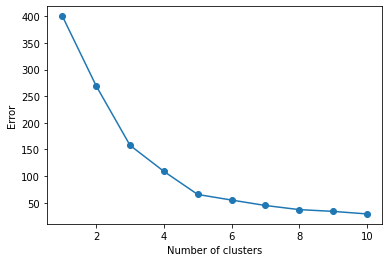

In [6]:
import matplotlib.pyplot as plt

error = []
for i in range(1, 11): # here we test the cluster number from 1 to 10
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    error.append(km.inertia_)

# The plot() function in pyplot module of matplotlib library is used to make a 2D plot of points x, y.
plt.plot(range(1, 11), error, marker='o') # plot errors vs cluster numbers 
plt.xlabel('Number of clusters') # define the x-axis label
plt.ylabel('Error') # define the y-axis label
plt.show()

As we can see in the above plot, the elbow is located at k=5, which is evidence that k=5 is indeed a good choice for grouping the customers.

In [7]:
km = KMeans(n_clusters=5, random_state=123)

y_km = km.fit_predict(df[["Annual Income (k$)", "Spending Score (1-100)"]])

df["clusters"] = y_km

df.head()

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Annual Income (k$),Spending Score (1-100),clusters
0,1,-1.738999,-0.434801,3
1,2,-1.738999,1.195704,4
2,3,-1.700830,-1.715913,3
3,4,-1.700830,1.040418,4
4,5,-1.662660,-0.395980,3


In [8]:
# the class 2 with 81 customers is the largest
df["clusters"].value_counts()

0    81
1    39
2    35
3    23
4    22
Name: clusters, dtype: int64

In [0]:
df[df.clusters == 2].mean()

In [0]:
df[df.clusters == 0].mean()

In [0]:
# the cluster centers by income and spending:
km.cluster_centers_

As the standardized data are not straightforward to read, we can convert the cluster dcenters back to the original scales:

In [0]:
# convert centers to the original scales and save results in dataframe
centers = pd.DataFrame(stdsc.inverse_transform(km.cluster_centers_))
centers.columns = ["Annual Income (k$)", "Spending Score (1-100)"]
centers

Here we can get interesting insight for profiling:

- cluster 0: low income, high spending
- cluster 1: high income, low spending
- cluster 2: medium income, medium spending
- cluster 3: high income, high spending
- cluster 4: low income, low spending

The largest cluster, cluster2, is a group of customers with medium income and spending.

## Assignment

In marketing competitor analysis, you assess the strengths and weaknesses of your rivals. You try to figure out what situations may provide an opportunity for them. Find situations which are likely to become a threat for them as well. A marketing competitor analysis is a critical part of your own marketing strategy.

Assume you are a marketing analyst of a major electronics retailer. You are researching your company’s e-commerce competitors and want to group the competitors based on their performance data. You have compiled a data set that contains the following four performance measures of the major competitors’ e-commerce operations: Annual Revenue (Revenue, in $), Growth Rate (in %), Monthly Visits (Visits), and Conversion Rate (in %). In order to avoid any personal bias in grouping these competitors, you replaced the names of the competitors with a code.

Please answer the following questions by using all four performance measures: 

1. Does the data set need to be standardized prior to cluster analysis? 
2. Apply k-mean clustering and identify the number of clusters using the elbow method. 
3. What are the size and cluster center values of the largest cluster of competitors?

In [0]:
# load data
import pandas as pd
df = pd.read_csv("competitors.csv")
df.head()